# Análisis Exploratorio de Datos

Guillermo Luigui Ubaldo Nieto Angarita

## Guia

https://spotintelligence.com/2023/09/15/exploratory-data-analysis-nlp/

Datos tomados de: https://www.sciencedirect.com/science/article/pii/S2352340925000162

## Categorías y Descripciones

1. **Economic**
- **Descripción**: Costos, beneficios u otras implicaciones financieras.
- **Ejemplo**: Artículos que analizan el impacto económico de las políticas de inmigración.

2. **Capacity and Resources**
- **Descripción**: Disponibilidad de recursos físicos, humanos o financieros, y la capacidad de los sistemas actuales.
- **Ejemplo**: Cobertura sobre la capacidad del sistema de salud durante una pandemia.

3. **Morality**
- **Descripción**: Implicaciones religiosas o éticas.
- **Ejemplo**: Debates sobre las leyes del aborto.

4. **Fairness and Equality**
- **Descripción**: Equilibrio o distribución de derechos, responsabilidades y recursos.
- **Ejemplo**: Discusiones sobre la desigualdad de ingresos y la justicia social.

5. **Legality, Constitutionality, and Jurisprudence**
- **Descripción**: Derechos, libertades y autoridad de individuos, corporaciones y el gobierno.
- **Ejemplo**: Análisis legales sobre nuevas legislaciones que afectan las libertades civiles.

6. **Policy Prescription and Evaluation**
- **Descripción**: Discusión sobre políticas específicas dirigidas a abordar problemas.
- **Ejemplo**: Opiniones sobre estrategias de mitigación del cambio climático.

7. **Crime and Punishment**
- **Descripción**: Efectividad e implicaciones de las leyes y su aplicación.
- **Ejemplo**: Informes sobre los esfuerzos de reforma del sistema de justicia penal.

8. **Security and Defense**
- **Descripción**: Amenazas al bienestar del individuo, la comunidad o la nación.
- **Ejemplo**: Preocupaciones sobre la seguridad nacional relacionadas con el control fronterizo.

9. **Health and Safety**
- **Descripción**: Atención médica, saneamiento y seguridad pública.
- **Ejemplo**: Medidas para combatir la propagación de enfermedades infecciosas.

10. **Quality of Life**
- **Descripción**: Amenazas y oportunidades para la riqueza, felicidad y bienestar del individuo.
- **Ejemplo**: El impacto del desarrollo urbano en el bienestar de los residentes.

11. **Cultural Identity**
- **Descripción**: Tradiciones, costumbres o valores de un grupo social en relación con un tema político.
- **Ejemplo**: Preservación de los idiomas y culturas indígenas.

12. **Public Opinion**
- **Descripción**: Actitudes y opiniones del público en general, incluidas encuestas y demografía.
- **Ejemplo**: Encuestas sobre el apoyo público a las fuentes de energía renovable.

13. **Political**
- **Descripción**: Consideraciones relacionadas con la política y los políticos, incluidas actividades de cabildeo, elecciones e intentos de influir en los votantes.
- **Ejemplo**: Estrategias de campaña electoral y esfuerzos de movilización de votantes.

14. **External Regulation and Reputation**
- **Descripción**: Reputación internacional o política exterior.
- **Ejemplo**: Relaciones diplomáticas y acuerdos internacionales.

15. **Other**
- **Descripción**: Cualquier grupo coherente de marcos no cubierto por las categorías anteriores.
- **Ejemplo**: Marcos únicos o emergentes específicos de problemas contemporáneos.



## Problema de Investigación

La mayoría de los modelos propuestos de QA, están enfocados en el idioma inglés (Upadhyay et al., 2024). A pesar de que el español es una de las lenguas más habladas en el mundo, la escasez de recursos en este idioma crea un desafío para el entrenamiento y evaluación de los modelos de Procesamiento de Lenguaje Natural (PLN) (Padilla Cuevas et al., 2024). Algunos de los conjuntos de datos utilizados para el español han sido traducidos automáticamente por una máquina y son usados en otros idiomas lo que produce riesgo de imprecisiones, anomalías e incapacidad de identificar aspectos sutiles en cada contexto cultural, expresiones idiomáticas y matices lingüísticos que pueden ser necesarios para generar preguntas coherentes y contextualmente relevantes (de-Fitero-Dominguez et al., 2024). Los modelos multilingües están diseñados para ser generalizados en varios idiomas, pero tienen la dificultad de no capturar todos los aspectos lingüísticos de una lengua específica (de-Fitero-Dominguez et al., 2024). Como consecuencia, se observa una desigualdad en el rendimiento de inteligencias artificiales en distintas lenguas al inglés (de-Fitero-Dominguez et al., 2024). La meta de esta investigación es buscar disminuir la brecha de la falta de datos en español para entrenar los modelos, construyendo un sistema QA utilizando un conjunto de datos en español.

## Planteamiento del problema

El desarrollo y entrenamiento de modelos de PLN en el idioma español está muy limitado y está afectando el rendimiento de los sistemas QA, reduciendo su capacidad de comprensión y generación de respuestas. Este estudio busca investigar cómo optimizar los modelos QA para el análisis periodístico aplicando el fine-tuning con un conjunto de datos de las noticias en Colombia y México.

## Pregunta de investigación

¿Cómo mejorar el rendimiento de los sistemas question answering en español, mediante el procesamiento de lenguaje natural (PLN) y un conjunto de datos de artículos de noticias de Colombia y México entre mayo de 2022 y agosto de 2023, que permita responder consultas sobre su contenido?

## Objetivo General

Mejorar el rendimiento de los sistemas de question answering en español, mediante el procesamiento de lenguaje natural (PLN) y un conjunto de datos de artículos de noticias de Colombia y México entre mayo de 2022 y agosto de 2023, que permita responder consultas sobre su contenido.

## Objetivos Específicos

1. Explorar el corpus de noticias en español de Colombia y México para identificar características lingüísticas relevantes para la generación de preguntas y respuestas.
2. Implementar mejoras en diferentes modelos de question-answering para contestar consultas sobre un conjunto de datos de noticias de Colombia y México.
3. Evaluar el rendimiento de los modelos implementados utilizando métricas como Exact Match (EM), F1-score, Accuracy, Precision, Recall, BLEU y ROUGE.


## Paso 1: Cargar Librerías

In [14]:
!python -m spacy download es_core_news_sm

     --------------------------------------- 12.9/12.9 MB 46.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os
import string
import spacy
import math
import networkx as nx
import unicodedata

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
from itertools import combinations
from scipy import stats
from collections import defaultdict
from flair.data import Sentence
from flair.models import SequenceTagger

c:\QA\tesis-optimizacion-de-modelos-de-question-answering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Paso 2: Cargar Datos

In [3]:
df = pd.read_csv("../data/labels.csv")

In [4]:
folder_path = "../data/articles/"

In [5]:
files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]

In [6]:
article_data = []
for file in files:
    with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
        content = f.read()
        article_data.append(content)

In [7]:
df.insert(1, "news", article_data)

In [8]:
df["country"] = "Mexico"
df.loc[:71, "country"] = "Colombia"

In [9]:
df[df["principal_frames"] == "other"]

,id,news,frames,tone,principal_frames,economic,capacity_and_resources,morality,fairness_and_equality,legality_constitutionality_and_jurisprudence,policy_prescription_and_evaluation,crime_and_punishment,security_and_defense,health_and_safety,quality_of_life,cultural_identity,public_opinion,political,external_regulation_and_reputation,country
19,Noticia_71.txt,Congreso realiza conversatorio sobre reforma c...,['public_opinion'],neutral,other,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Colombia


In [10]:
df.loc[df["principal_frames"] == "other", "principal_frames"] = "public_opinion"

In [11]:
df.head()

,id,news,frames,tone,principal_frames,economic,capacity_and_resources,morality,fairness_and_equality,legality_constitutionality_and_jurisprudence,policy_prescription_and_evaluation,crime_and_punishment,security_and_defense,health_and_safety,quality_of_life,cultural_identity,public_opinion,political,external_regulation_and_reputation,country
0,Noticia_1.txt,¿Cuánto tiempo estoy autorizado a permanecer e...,"['external_regulation_and_reputation', 'legali...",neutral,legality_constitutionality_and_jurisprudence,0,0,0,0,1,1,1,0,0,0,0,0,0,1,Colombia
1,Noticia_2.txt,Colombia y Venezuela instalaron comisión de ve...,"['policy_prescription_and_evaluation', 'politi...",neutral,political,1,0,1,0,0,1,0,0,0,0,0,1,1,1,Colombia
2,Noticia_7.txt,"Atrasar proceso electoral hasta enero de 2024,...","['political', 'quality_of_life', 'public_opini...",neutral,political,0,0,0,0,0,0,0,0,0,1,0,1,1,0,Colombia
3,Noticia_8.txt,Avanza SLP en cuanto a transparencia presupues...,"['policy_prescription_and_evaluation', 'public...",neutral,policy_prescription_and_evaluation,0,0,0,0,0,1,0,0,0,0,0,1,0,1,Colombia
4,Noticia_9.txt,Confía dirigente del PT en mantener el registr...,"['external_regulation_and_reputation', 'qualit...",negative,fairness_and_equality,0,1,0,1,0,1,0,0,0,1,0,1,0,1,Colombia


In [12]:
df.tail()

,id,news,frames,tone,principal_frames,economic,capacity_and_resources,morality,fairness_and_equality,legality_constitutionality_and_jurisprudence,policy_prescription_and_evaluation,crime_and_punishment,security_and_defense,health_and_safety,quality_of_life,cultural_identity,public_opinion,political,external_regulation_and_reputation,country
135,Noticia_120.txt,Vacaciones de terror: agencia de viajes poblan...,"['public_opinion', 'political', 'quality_of_li...",neutral,political,0,0,0,0,0,0,0,0,0,1,0,1,1,0,Mexico
136,Noticia_119.txt,"En SLP, la gasolina más barata se vende por de...","['capacity_and_resources', 'economic', 'politi...",neutral,economic,1,1,0,0,0,0,0,0,0,0,0,1,1,0,Mexico
137,Noticia_118.txt,Inflación baja a 4.79% en la primera mitad de ...,"['security_and_defense', 'political']",positive,security_and_defense,0,0,0,0,0,0,0,1,0,0,0,0,1,0,Mexico
138,Noticia_117.txt,Reducción de jornada laboral provocará un desp...,"['security_and_defense', 'morality', 'public_o...",neutral,security_and_defense,0,0,1,0,1,0,0,1,0,1,0,1,1,0,Mexico
139,Noticia_116.txt,Advierte Ricardo Gallardo más cambios en su ga...,"['policy_prescription_and_evaluation', 'public...",positive,policy_prescription_and_evaluation,0,0,0,1,0,1,0,0,0,0,0,1,1,0,Mexico


## Paso 1: Preprocesamiento de los textos

### Paso 1.1: Descargar tokenizador

In [15]:
nlp_spacy = spacy.load("es_core_news_sm")

### Paso 1.2: Guardar los datos originales

In [52]:
df_original = df.copy()

### Paso 1.3: Eliminación de elementos no deseados

In [16]:
def extract_text_without_unwanted_elements(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

### Paso 1.4: Conversión a minúsculas

In [17]:
def convertToLowerCase(text):
    return text.lower()

### Paso 1.5: Transformación UNICODE

In [18]:
def unicodeTransformation(text, method="NFKD"):
    return unicodedata.normalize(method, text)

### Paso 1.6 Tokenización

In [19]:
def spacy_tokenization(text):
    tokens = [token.text for token in nlp_spacy(text)]
    return " ".join(tokens)

### Paso 1.7 Eliminación de Stop Words

In [20]:
def remove_stopwords_spacy(text):
    """
    Return Spanish text without stop words using spaCy
    """
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(text)
    filtered = [token.text for token in doc if not token.is_stop]
    return " ".join(filtered)

In [21]:
def get_stopwords_spacy(text):
    """
    Return stop words from Spanish text using spaCy
    """
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(text)
    text_stopwords = [token.text for token in doc if token.is_stop]
    return " ".join(text_stopwords)

### Paso 1.8 Lematización

In [59]:
def lemmatize_with_flair(text):
    """Lematizar texto usando Flair"""
    tagger = SequenceTagger.load('pos-fast')
    sentence = Sentence(text)
    tagger.predict(sentence)
    lemmas = [token.text for token in sentence.tokens]
    return " ".join(lemmas)

### 1.13 Procedimiento de Textos

In [22]:
df["news_cleaned"] = df["news"].apply(extract_text_without_unwanted_elements)

In [23]:
df["news_cleaned"] = df["news_cleaned"].apply(convertToLowerCase)

In [24]:
df["news_cleaned"] = df["news_cleaned"].apply(unicodeTransformation)

In [25]:
df["news_stopwords"] = df["news_cleaned"].apply(get_stopwords_spacy)

In [26]:
df["news_cleaned_without_stopwords"] = df["news_cleaned"].apply(remove_stopwords_spacy)

In [27]:
df["news_tokens"] = df["news_cleaned_without_stopwords"].apply(spacy_tokenization)

In [65]:
df["news_lemmes"] = df["news_tokens"].apply(lemmatize_with_flair)

2025-08-21 23:18:37,434 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
2025-08-21 23:18:38,302 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
2025-08-21 23:18:39,142 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
2025-08-21 23:18:39,762 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, 

In [28]:
corpus = df["news"].tolist()

In [29]:
corpus_tokens = df["news_tokens"].tolist()

## Paso 2: Estadísticas básicas

In [30]:
def compute_statistics(text):
    word_count = len(text.split())  # Number of words
    char_count = len(text)  # Number of characters
    sentence_count = len(re.split(r'[.!?]', text)) - 1  # Number of sentences
    avg_word_length = sum(len(word) for word in text.split()) / word_count if word_count > 0 else 0  # Average word length
    return pd.Series([word_count, char_count, sentence_count, avg_word_length],
                     index=['word_count', 'character_count', 'sentence_count', 'average_word_length'])

### Paso 2.1 Conteo de Palabras

#### Paso 2.1.1 Conteo de Palabras Originales

In [31]:
total_words = sum(len(doc.split()) for doc in corpus)
print("Número total de palabras en el corpus:", total_words)

Número total de palabras en el corpus: 69644


#### Paso 2.1.2 Conteo de Palabras Texto Limpio

In [32]:
total_words_tokens = sum(len(doc.split()) for doc in corpus_tokens)
print("Número total de palabras en el corpus de tokens limpio:", total_words_tokens)

Número total de palabras en el corpus de tokens limpio: 33433


#### Paso 2.1.3 Conteo de Palabras por Tono

In [33]:
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))

words_per_tone = (
    df.groupby("tone")["word_count"]
      .sum()
      .reset_index()
      .sort_values(by="word_count", ascending=False)  # ordenar de mayor a menor
)

print("Número total de palabras agrupadas por tono en las noticias (ordenado):")
print(words_per_tone)


Número total de palabras agrupadas por tono en las noticias (ordenado):
       tone  word_count
1   neutral       28329
0  negative       26501
2  positive       14814


#### Paso 2.1.4 Conteo de Palabras por Sesgo

In [34]:
# Contar palabras por fila
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))

# Agrupar por principal_frames y sumar palabras
words_per_frame = (
    df.groupby("principal_frames")["word_count"]
      .sum()
      .reset_index()
      .sort_values(by="word_count", ascending=False)
)

print("Número total de palabras agrupadas por marco principal en las noticias (ordenado):")
print(words_per_frame)


Número total de palabras agrupadas por marco principal en las noticias (ordenado):
                                principal_frames  word_count
13                          security_and_defense       13648
10                                     political       11630
11                                public_opinion        8145
3                                       economic        6956
1                           crime_and_punishment        6336
7   legality_constitutionality_and_jurisprudence        4751
6                              health_and_safety        4526
9             policy_prescription_and_evaluation        4321
4             external_regulation_and_reputation        3313
8                                       morality        2198
12                               quality_of_life        1385
2                              cultural_identity        1122
0                         capacity_and_resources         990
5                          fairness_and_equality         323


#### Paso 2.1.5 Conteo de Palabras por Country

In [35]:
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))

words_per_country = (
    df.groupby("country")["word_count"]
      .sum()
      .reset_index()
      .sort_values(by="word_count", ascending=False)
)

print("Número total de palabras agrupadas por país en las noticias (ordenado):")
print(words_per_country)


Número total de palabras agrupadas por país en las noticias (ordenado):
    country  word_count
1    Mexico       39369
0  Colombia       30275


### Paso 2.2 Conteo de caracteres

#### Paso 2.2.1 Conteo de Caracteres Originales

In [36]:
# Total de caracteres en el corpus
total_characters = sum(len(doc) for doc in corpus)
print("Número total de caracteres en el corpus:", total_characters)

Número total de caracteres en el corpus: 428800


#### Paso 2.2.2 Conteo de Caracteres Texto Limpio

In [37]:
total_characters_tokens = sum(len(token) for doc in corpus_tokens for token in doc)
print("Número total de caracteres en el corpus de tokens limpio:", total_characters_tokens)

Número total de caracteres en el corpus de tokens limpio: 295955


#### Paso 2.2.3 Conteo de Caracteres por Tono

In [38]:
# Contar caracteres por fila
df["char_count"] = df["news"].apply(lambda x: len(str(x)))

# Agrupar por tono y sumar caracteres
chars_per_tone = (
    df.groupby("tone")["char_count"]
      .sum()
      .reset_index()
      .sort_values(by="char_count", ascending=False)  # ordenar de mayor a menor
)

print("Número total de caracteres agrupados por tono en las noticias (ordenado):")
print(chars_per_tone)

Número total de caracteres agrupados por tono en las noticias (ordenado):
       tone  char_count
1   neutral      172930
0  negative      165648
2  positive       90222


#### Paso 2.2.4 Conteo de Caracteres por Sesgo

In [39]:
# Contar caracteres por fila
df["char_count"] = df["news"].apply(lambda x: len(str(x)))

# Agrupar por principal_frames y sumar caracteres
chars_per_frame = (
    df.groupby("principal_frames")["char_count"]
      .sum()
      .reset_index()
      .sort_values(by="char_count", ascending=False)
)

print("Número total de caracteres agrupados por marco principal en las noticias (ordenado):")
print(chars_per_frame)

Número total de caracteres agrupados por marco principal en las noticias (ordenado):
                                principal_frames  char_count
13                          security_and_defense       84880
10                                     political       70732
11                                public_opinion       50277
3                                       economic       41959
1                           crime_and_punishment       38805
7   legality_constitutionality_and_jurisprudence       29241
6                              health_and_safety       28509
9             policy_prescription_and_evaluation       26436
4             external_regulation_and_reputation       20340
8                                       morality       14041
12                               quality_of_life        8674
2                              cultural_identity        6908
0                         capacity_and_resources        6108
5                          fairness_and_equality        1890


#### Paso 2.2.5 Conteo de Palabras por Country

In [40]:
# Contar caracteres por fila
df["char_count"] = df["news"].apply(lambda x: len(str(x)))

# Agrupar por país y sumar caracteres
chars_per_country = (
    df.groupby("country")["char_count"]
      .sum()
      .reset_index()
      .sort_values(by="char_count", ascending=False)
)

print("Número total de caracteres agrupados por país en las noticias (ordenado):")
print(chars_per_country)

Número total de caracteres agrupados por país en las noticias (ordenado):
    country  char_count
1    Mexico      243010
0  Colombia      185790


### Paso 2.3: Conteo de oraciones

#### Paso 2.3.1 Conteo de Oraciones Originales

In [41]:
import re
total_sentences = sum(len(re.split(r'[.!?]+', doc)) - 1 for doc in corpus)
print("Número total de oraciones en el corpus:", total_sentences)

Número total de oraciones en el corpus: 2622


#### Paso 2.3.2 Conteo de Oraciones por Tono

In [42]:
import re

# Contar oraciones por fila
df["sentence_count"] = df["news"].apply(lambda x: len(re.split(r'[.!?]+', str(x))) - 1)

# Agrupar por tono y sumar oraciones
sentences_per_tone = (
    df.groupby("tone")["sentence_count"]
      .sum()
      .reset_index()
      .sort_values(by="sentence_count", ascending=False)  # ordenar de mayor a menor
)

print("Número total de oraciones agrupadas por tono en las noticias (ordenado):")
print(sentences_per_tone)

Número total de oraciones agrupadas por tono en las noticias (ordenado):
       tone  sentence_count
0  negative            1050
1   neutral            1038
2  positive             534


#### Paso 2.3.3 Conteo de Oraciones por Sesgo

In [43]:
import re

# Contar oraciones por fila
df["sentence_count"] = df["news"].apply(lambda x: len(re.split(r'[.!?]+', str(x))) - 1)

# Agrupar por principal_frames y sumar oraciones
sentences_per_frame = (
    df.groupby("principal_frames")["sentence_count"]
      .sum()
      .reset_index()
      .sort_values(by="sentence_count", ascending=False)
)

print("Número total de oraciones agrupadas por marco principal en las noticias (ordenado):")
print(sentences_per_frame)

Número total de oraciones agrupadas por marco principal en las noticias (ordenado):
                                principal_frames  sentence_count
13                          security_and_defense             514
10                                     political             410
11                                public_opinion             344
3                                       economic             272
1                           crime_and_punishment             224
7   legality_constitutionality_and_jurisprudence             213
6                              health_and_safety             165
9             policy_prescription_and_evaluation             145
4             external_regulation_and_reputation             100
8                                       morality              85
12                               quality_of_life              57
0                         capacity_and_resources              51
2                              cultural_identity              38
5     

#### Paso 2.3.4 Conteo de Palabras por Country

In [44]:
import re

# Contar oraciones por fila
df["sentence_count"] = df["news"].apply(lambda x: len(re.split(r'[.!?]+', str(x))) - 1)

# Agrupar por país y sumar oraciones
sentences_per_country = (
    df.groupby("country")["sentence_count"]
      .sum()
      .reset_index()
      .sort_values(by="sentence_count", ascending=False)
)

print("Número total de oraciones agrupadas por país en las noticias (ordenado):")
print(sentences_per_country)

Número total de oraciones agrupadas por país en las noticias (ordenado):
    country  sentence_count
1    Mexico            1612
0  Colombia            1010


### Paso 2.4: longitud promedio de palabra

#### Paso 2.4.1 Longitud Promedio de Palabras Originales

In [45]:
# Calcular el promedio de longitud de palabra en el corpus
total_words = sum(len(doc.split()) for doc in corpus)
total_characters = sum(len(word) for doc in corpus for word in doc.split())

avg_word_length = total_characters / total_words if total_words > 0 else 0

print("Longitud promedio de palabra en el corpus:", avg_word_length)

Longitud promedio de palabra en el corpus: 5.089971856872093


#### Paso 2.4.2 Longitud Promedio de Palabras por Tono

In [46]:
import re

# Calcular total de caracteres y total de palabras por fila
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["news"].apply(lambda x: sum(len(word) for word in str(x).split()))

# Calcular longitud promedio de palabra por fila
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Agrupar por tono y calcular el promedio de longitudes
avg_word_length_per_tone = (
    df.groupby("tone")["avg_word_length"]
      .mean()
      .reset_index()
      .sort_values(by="avg_word_length", ascending=False)
)

print("Longitud promedio de palabra agrupada por tono en las noticias (ordenado):")
print(avg_word_length_per_tone)

Longitud promedio de palabra agrupada por tono en las noticias (ordenado):
       tone  avg_word_length
0  negative         5.147187
2  positive         5.045108
1   neutral         5.035655


#### Paso 2.4.3 Longitud Promedio de Palabras por Sesgo

In [47]:
import re

# Calcular total de palabras y caracteres por fila
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["news"].apply(lambda x: sum(len(word) for word in str(x).split()))

# Longitud promedio de palabra por fila
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Agrupar por principal_frames y calcular promedio de longitudes
avg_word_length_per_frame = (
    df.groupby("principal_frames")["avg_word_length"]
      .mean()
      .reset_index()
      .sort_values(by="avg_word_length", ascending=False)
)

print("Longitud promedio de palabra agrupada por marco principal en las noticias (ordenado):")
print(avg_word_length_per_frame)

Longitud promedio de palabra agrupada por marco principal en las noticias (ordenado):
                                principal_frames  avg_word_length
6                              health_and_safety         5.270859
12                               quality_of_life         5.202690
8                                       morality         5.176713
4             external_regulation_and_reputation         5.120270
11                                public_opinion         5.118465
13                          security_and_defense         5.105418
0                         capacity_and_resources         5.083759
2                              cultural_identity         5.057877
10                                     political         5.057523
1                           crime_and_punishment         5.049150
7   legality_constitutionality_and_jurisprudence         5.037178
9             policy_prescription_and_evaluation         5.030421
3                                       economic        

#### Paso 2.4.4 Longitud Promedio de Palabras por Country

In [48]:
import re

# Calcular total de palabras y caracteres por fila
df["word_count"] = df["news"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["news"].apply(lambda x: sum(len(word) for word in str(x).split()))

# Longitud promedio de palabra por fila
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Agrupar por país y calcular promedio de longitudes
avg_word_length_per_country = (
    df.groupby("country")["avg_word_length"]
      .mean()
      .reset_index()
      .sort_values(by="avg_word_length", ascending=False)
)

print("Longitud promedio de palabra agrupada por país en las noticias (ordenado):")
print(avg_word_length_per_country)

Longitud promedio de palabra agrupada por país en las noticias (ordenado):
    country  avg_word_length
0  Colombia         5.096557
1    Mexico         5.065690


## Paso 3: Tokenización

### Paso 4: Análisis de Stopwords

#### Paso 4.1: Frecuencia de los Stopwords en General

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\802419070.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df.head(20), palette='magma')


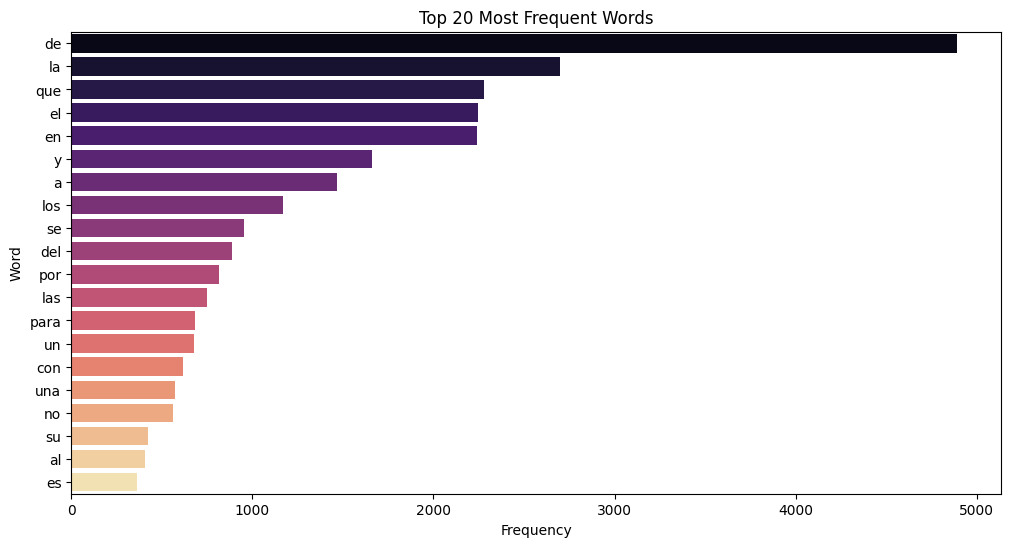

In [53]:
# Combine all text in the column into one string
all_text = ' '.join(df['news_stopwords'].dropna())

# Split into words
all_words = all_text.split()

# Count word frequencies
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Plot top 20 words
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=freq_df.head(20), palette='magma')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

#### Paso 4.2: Frecuencia de los Stopwords por Tono

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\973275992.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


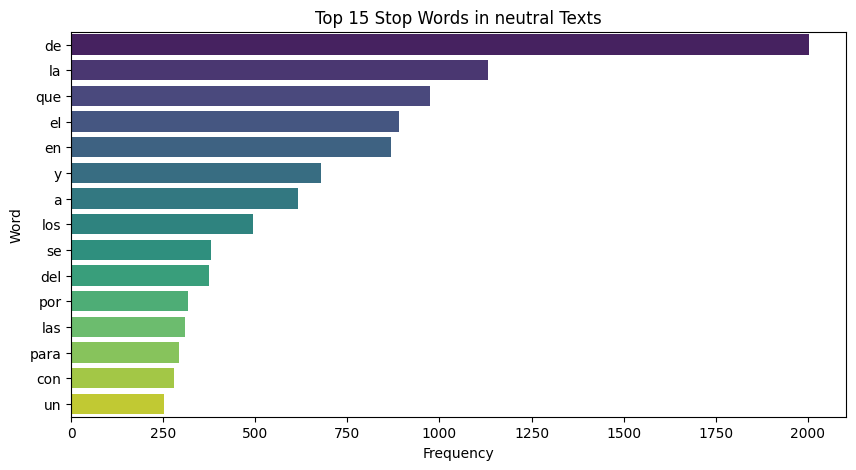

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\973275992.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


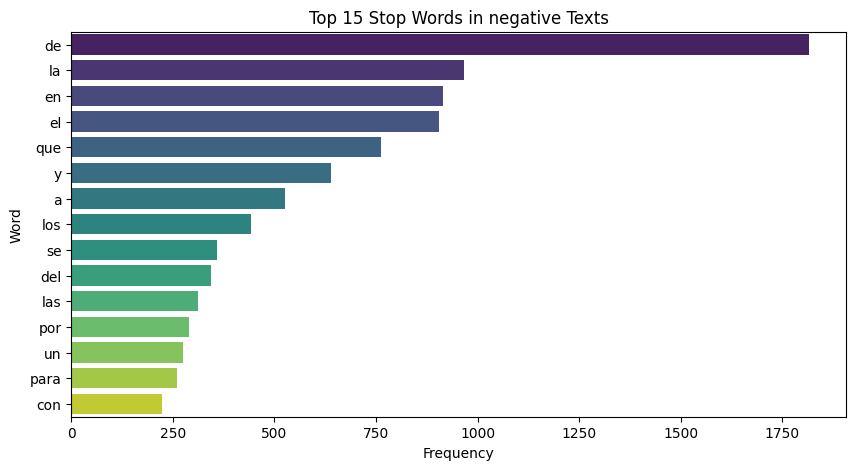

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\973275992.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


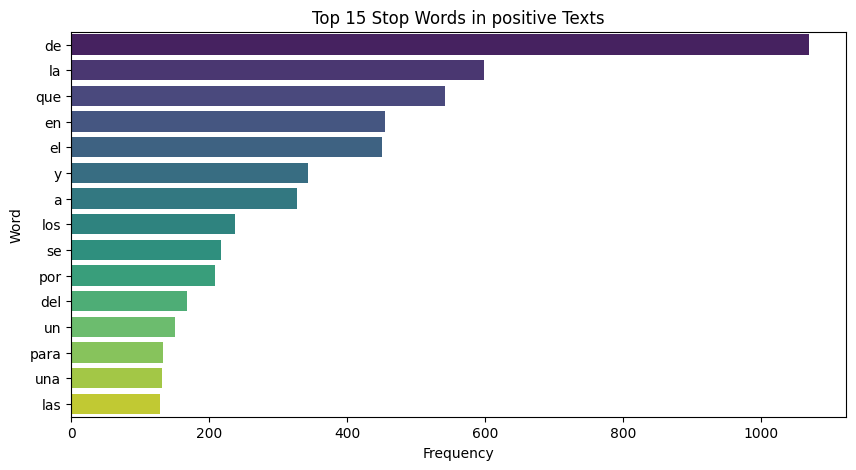

In [54]:
# Dictionary to hold word counts per tone
tone_word_counts = {}

# Loop through each tone
for tone in df['tone'].unique():
    # Combine all text for that tone
    text = ' '.join(df[df['tone'] == tone]['news_stopwords'].dropna())
    words = text.split()
    tone_word_counts[tone] = Counter(words)

# Plot top 15 words per tone
for tone, counter in tone_word_counts.items():
    freq_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(15)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
    plt.title(f'Top 15 Stop Words in {tone} Texts')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

#### Paso 4.3: Frecuencia de los Stopwords por Sesgo

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


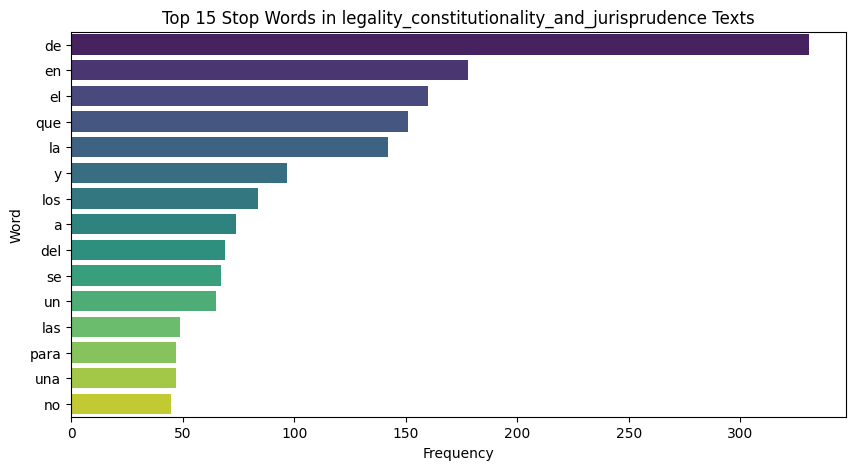

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


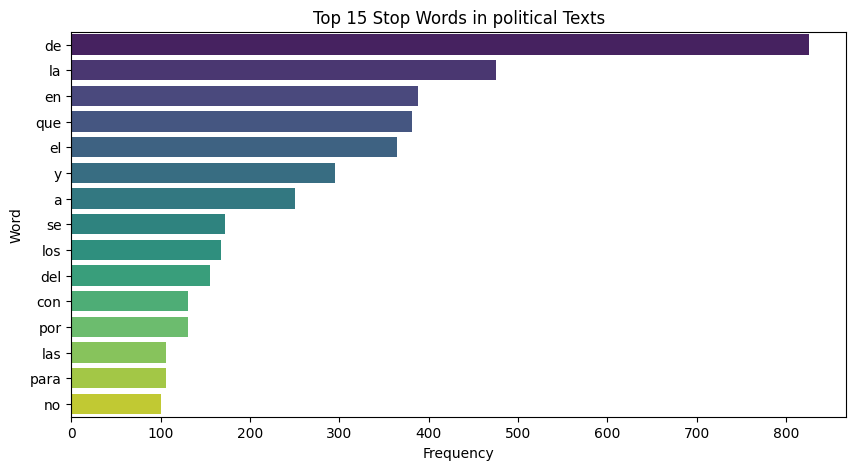

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


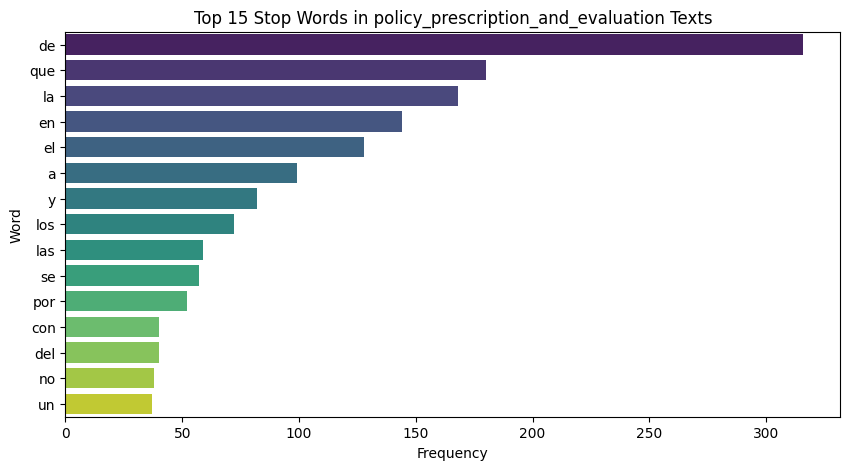

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


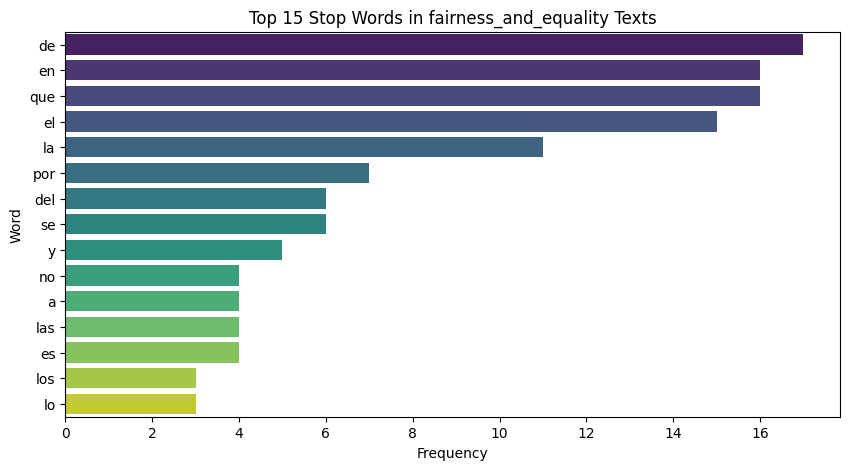

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


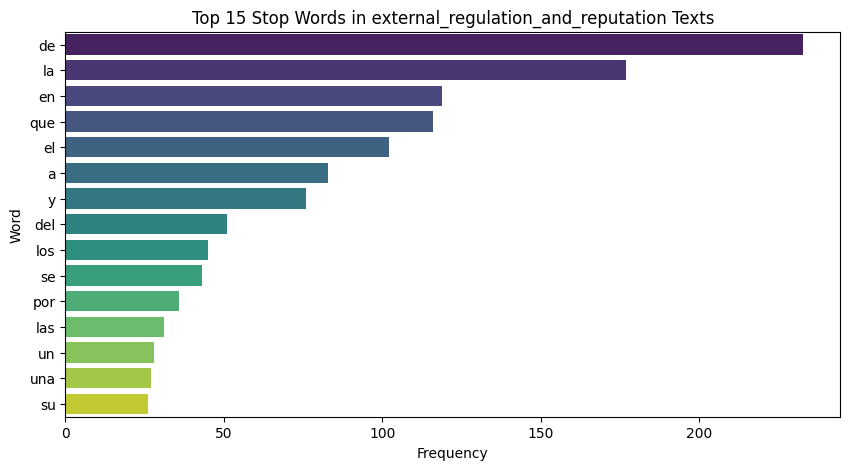

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


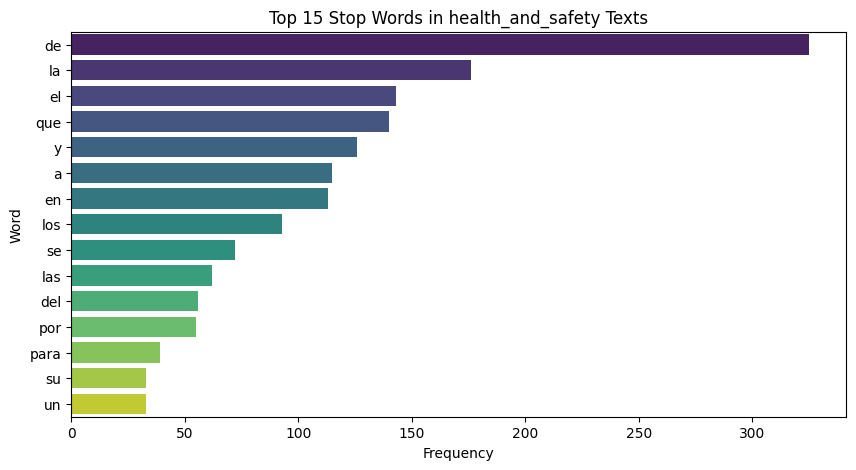

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


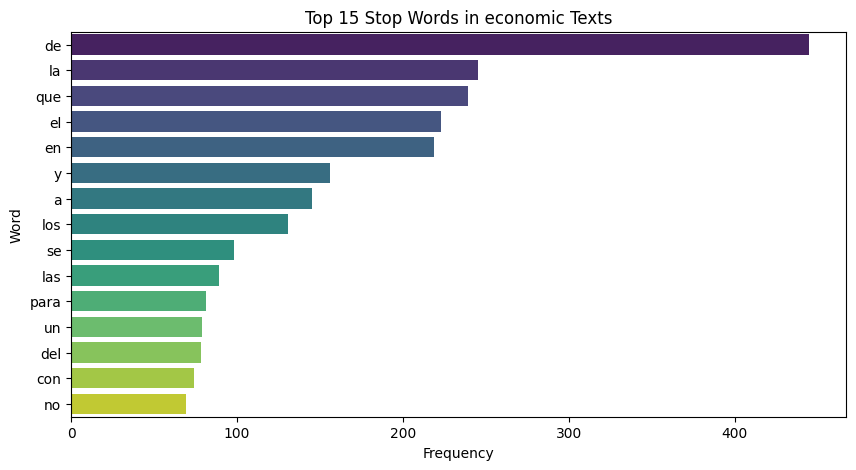

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


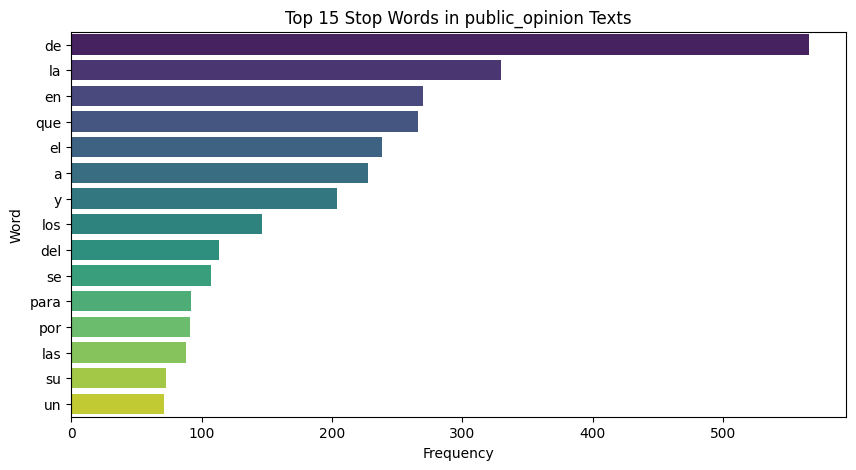

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


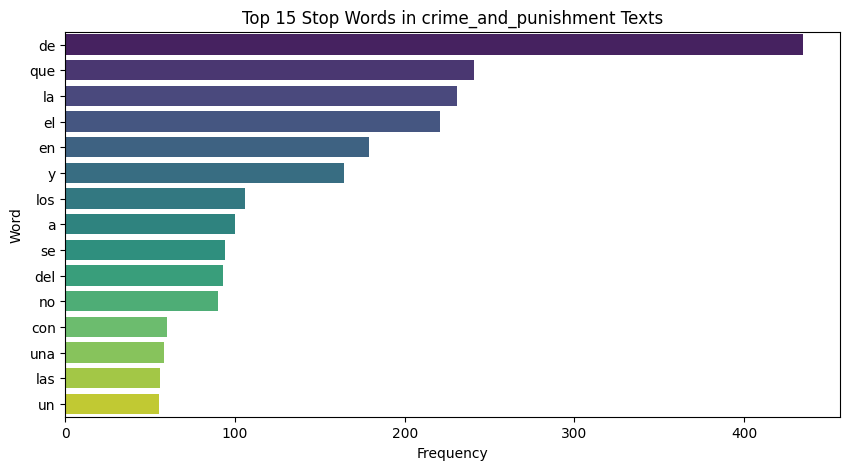

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


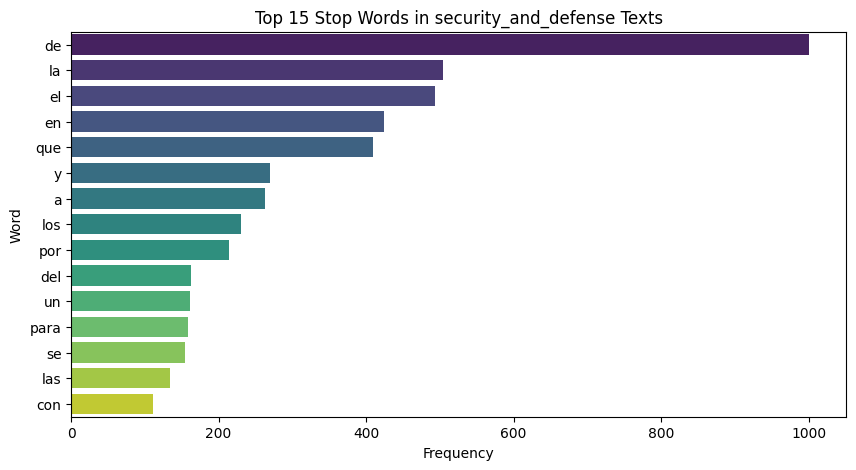

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


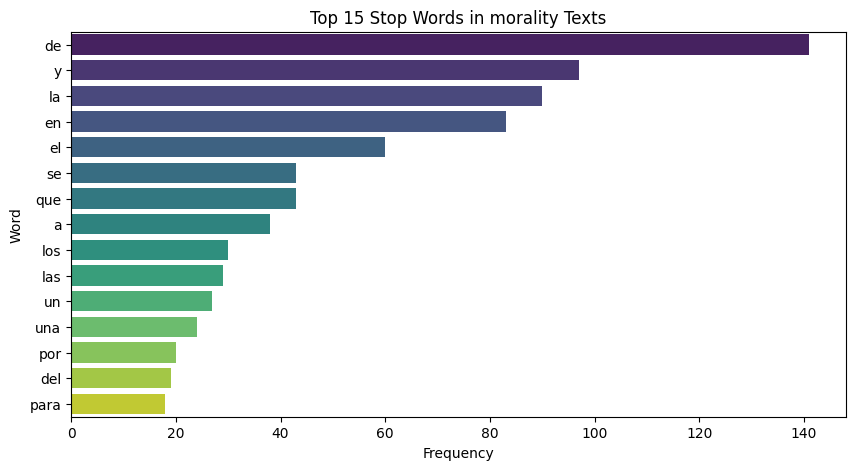

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


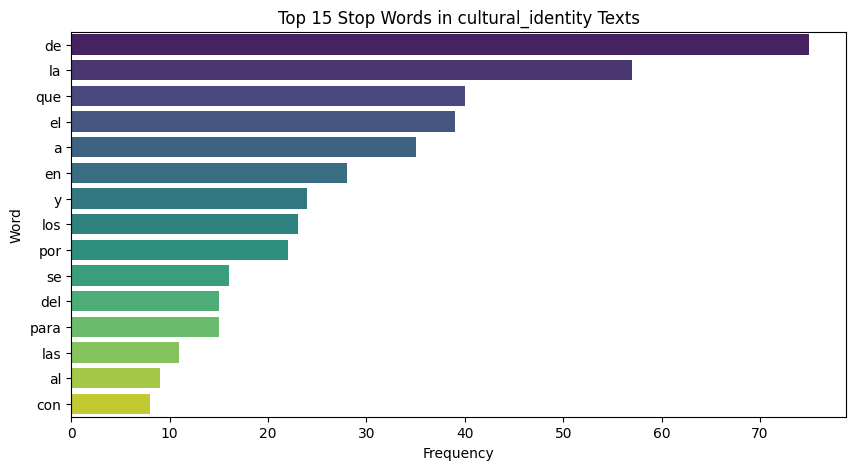

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


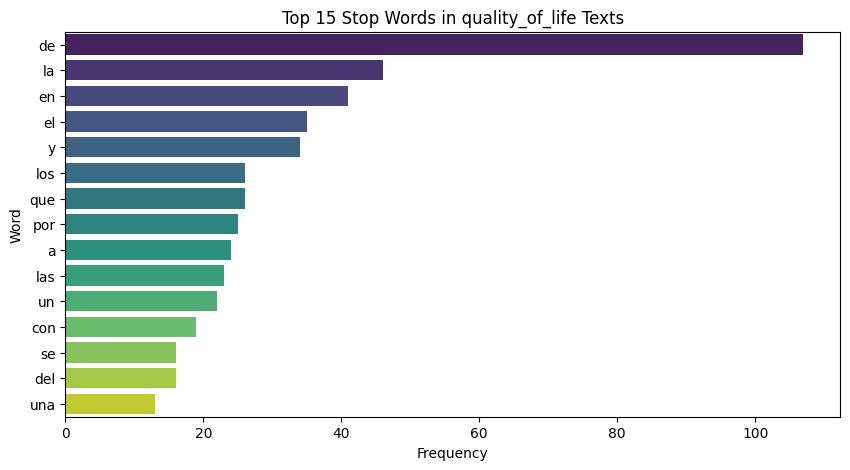

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\867601401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


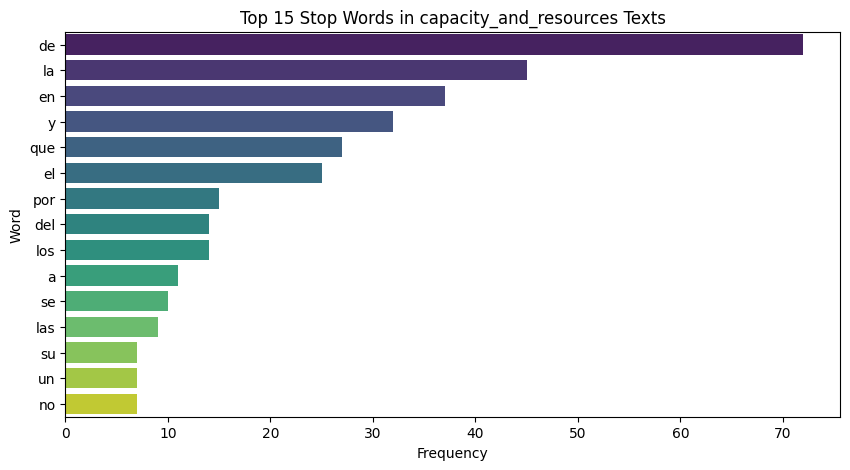

In [55]:
# Dictionary to hold word counts per tone
tone_word_counts = {}

# Loop through each tone
for tone in df['principal_frames'].unique():
    # Combine all text for that tone
    text = ' '.join(df[df['principal_frames'] == tone]['news_stopwords'].dropna())
    words = text.split()
    tone_word_counts[tone] = Counter(words)

# Plot top 15 words per tone
for tone, counter in tone_word_counts.items():
    freq_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(15)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
    plt.title(f'Top 15 Stop Words in {tone} Texts')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

#### Paso 4.4: Frecuencia de los Stopwords por País

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\775168227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


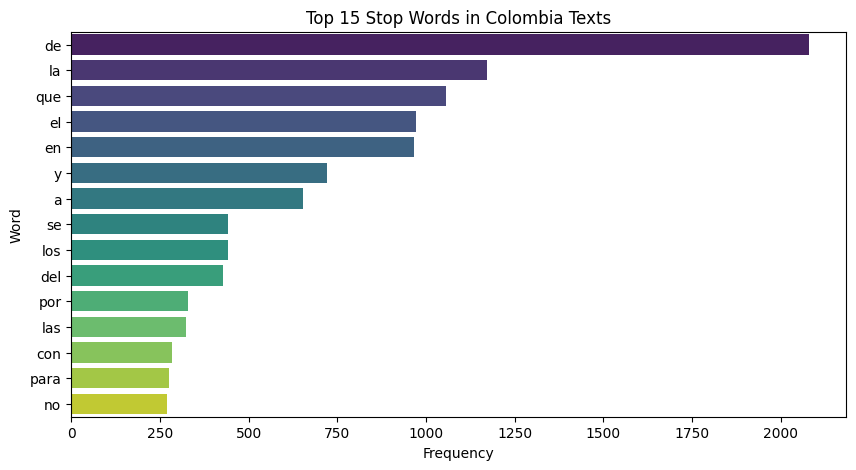

C:\Users\usuario\AppData\Local\Temp\ipykernel_17288\775168227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


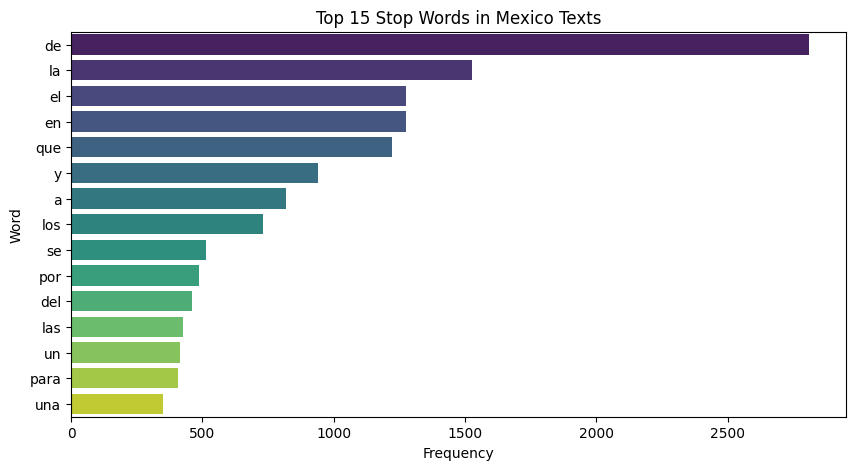

In [56]:
# Dictionary to hold word counts per tone
tone_word_counts = {}

# Loop through each tone
for tone in df['country'].unique():
    # Combine all text for that tone
    text = ' '.join(df[df['country'] == tone]['news_stopwords'].dropna())
    words = text.split()
    tone_word_counts[tone] = Counter(words)

# Plot top 15 words per tone
for tone, counter in tone_word_counts.items():
    freq_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(15)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
    plt.title(f'Top 15 Stop Words in {tone} Texts')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

## Paso 5: Descripción de Datos en NLP durante el Análisis Exploratorio de Datos

### Paso 4.1: Mostrar textos de ejemplo

#### Paso 4.1: Mostrar textos de ejemplo

In [57]:
df["news"].head()

0    ¿Cuánto tiempo estoy autorizado a permanecer e...
1    Colombia y Venezuela instalaron comisión de ve...
2    Atrasar proceso electoral hasta enero de 2024,...
3    Avanza SLP en cuanto a transparencia presupues...
4    Confía dirigente del PT en mantener el registr...
Name: news, dtype: object

#### Paso 4.1.2: Muestras aleatorias

In [58]:
df["news"].sample(5, random_state=42)

108    ¿Cómo es que Ecuador se está volviendo en terr...
67     El contrapunteo entre Gustavo Petro e Iván Duq...
31     México y EU sostienen reunión por fentanilo en...
119    Celebridades están en líos por promocionar cri...
42     Burocracia del gobierno estadounidense retrasa...
Name: news, dtype: object

### Paso 4.2: Estadísticas resumidas básicas

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numeric_cols = [
    "economic", "capacity_and_resources", "morality",
    "fairness_and_equality", "legality_constitutionality_and_jurisprudence",
    "policy_prescription_and_evaluation", "crime_and_punishment",
    "security_and_defense", "health_and_safety", "quality_of_life",
    "cultural_identity", "public_opinion", "political",
    "external_regulation_and_reputation"
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["frames_reduced"] = kmeans.fit_predict(X_scaled)

In [50]:
cluster_map = df.groupby("frames")["frames_reduced"].agg(lambda x: x.mode()[0])
print(cluster_map)

KeyError: 'Column not found: frames_reduced'

In [49]:
df["frames_reduced"]

KeyError: 'frames_reduced'

In [72]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (only need to run once)
nltk.download("stopwords")

# Load Spanish stopwords
spanish_stopwords = stopwords.words("spanish")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=spanish_stopwords   # <-- important
)
X_text = vectorizer.fit_transform(df["news"])

# Reduce dimensionality (optional)
svd = TruncatedSVD(n_components=100, random_state=42)
X_text_reduced = svd.fit_transform(X_text)


In [74]:
from sentence_transformers import SentenceTransformer

# Good multilingual models for Spanish:
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

X_text = model.encode(df["news"].tolist(), show_progress_bar=True)


Batches: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

# combine numeric + text features
X_combined = np.hstack([X_scaled, X_text])

# cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["combined_clusters"] = kmeans.fit_predict(X_combined)

In [76]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_combined, df["combined_clusters"])
print("Silhouette Score:", score)


Silhouette Score: 0.07158963478314159


In [77]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_combined, df["combined_clusters"])
print("Calinski-Harabasz:", ch_score)


Calinski-Harabasz: 9.300873770520065


In [78]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_combined, df["combined_clusters"])
print("Davies-Bouldin:", db_score)

Davies-Bouldin: 2.8444039868197333


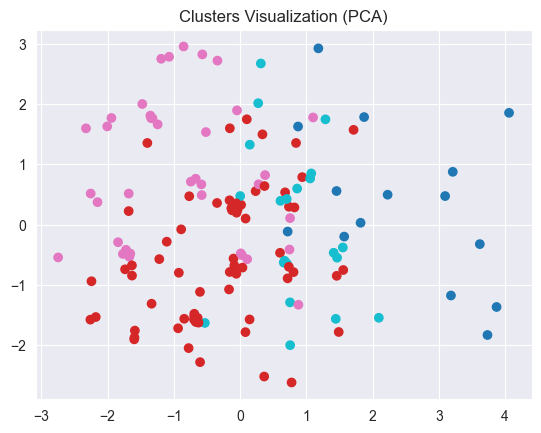

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_combined)

plt.scatter(X_2d[:,0], X_2d[:,1], c=df["combined_clusters"], cmap="tab10")
plt.title("Clusters Visualization (PCA)")
plt.show()

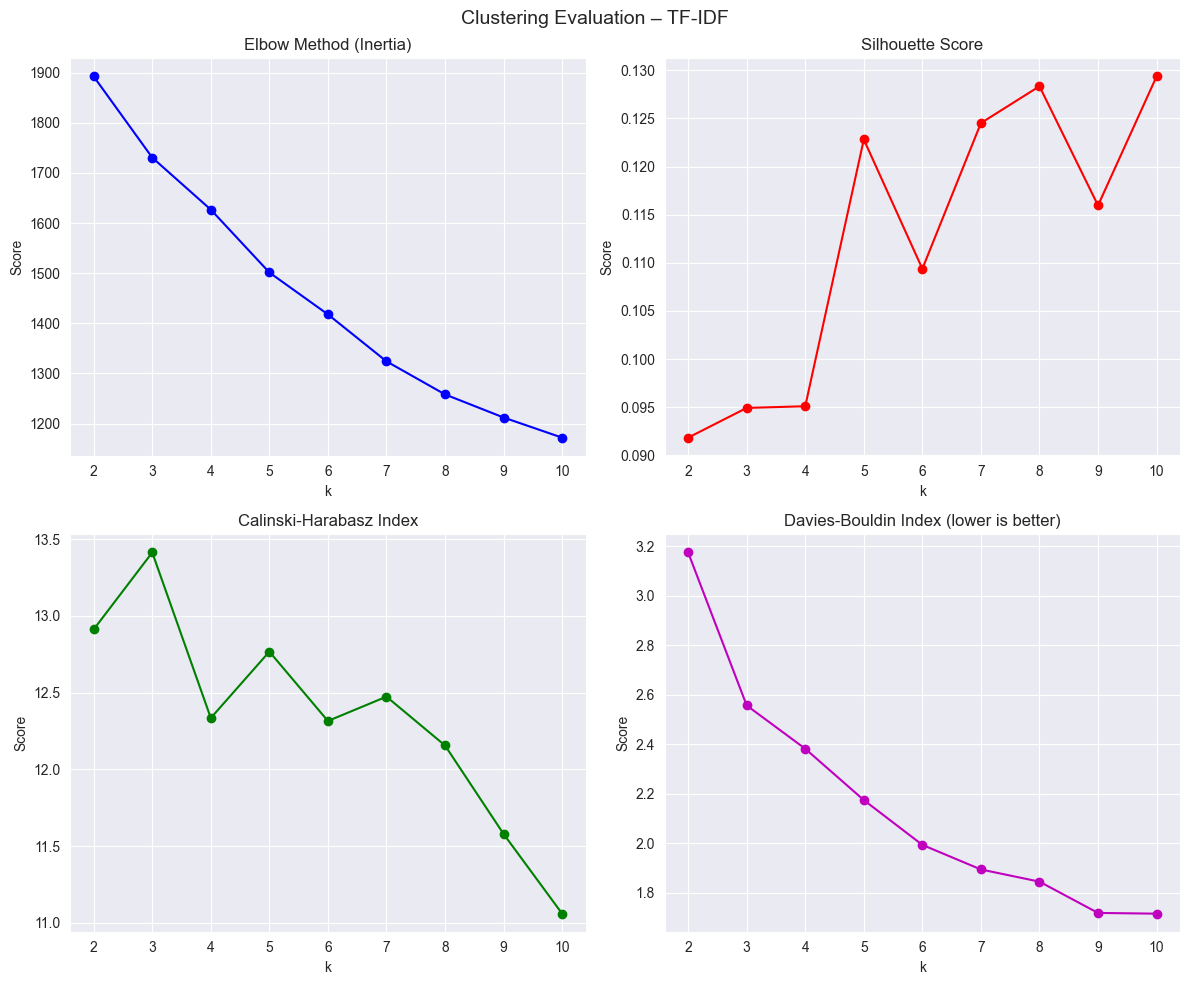

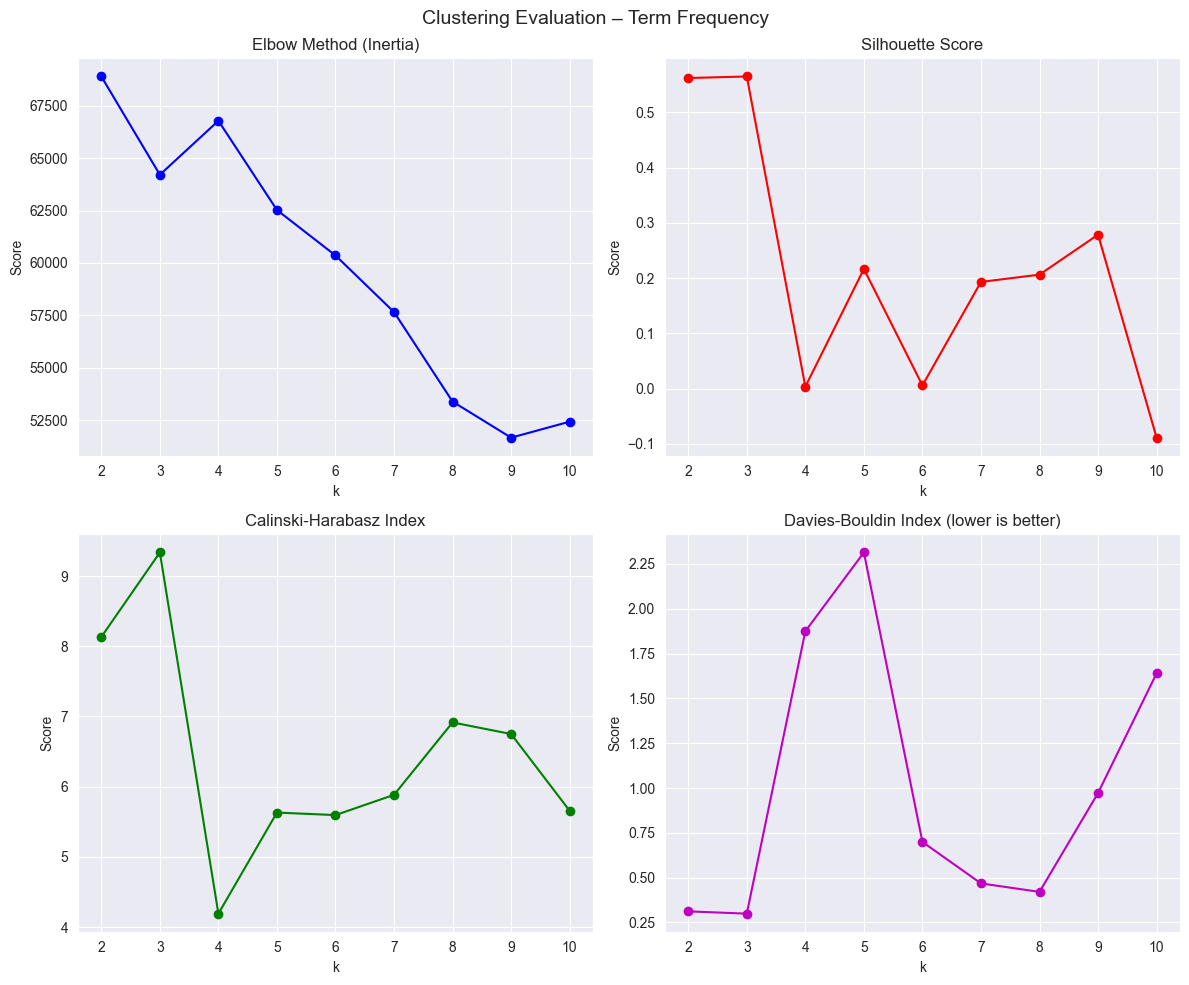

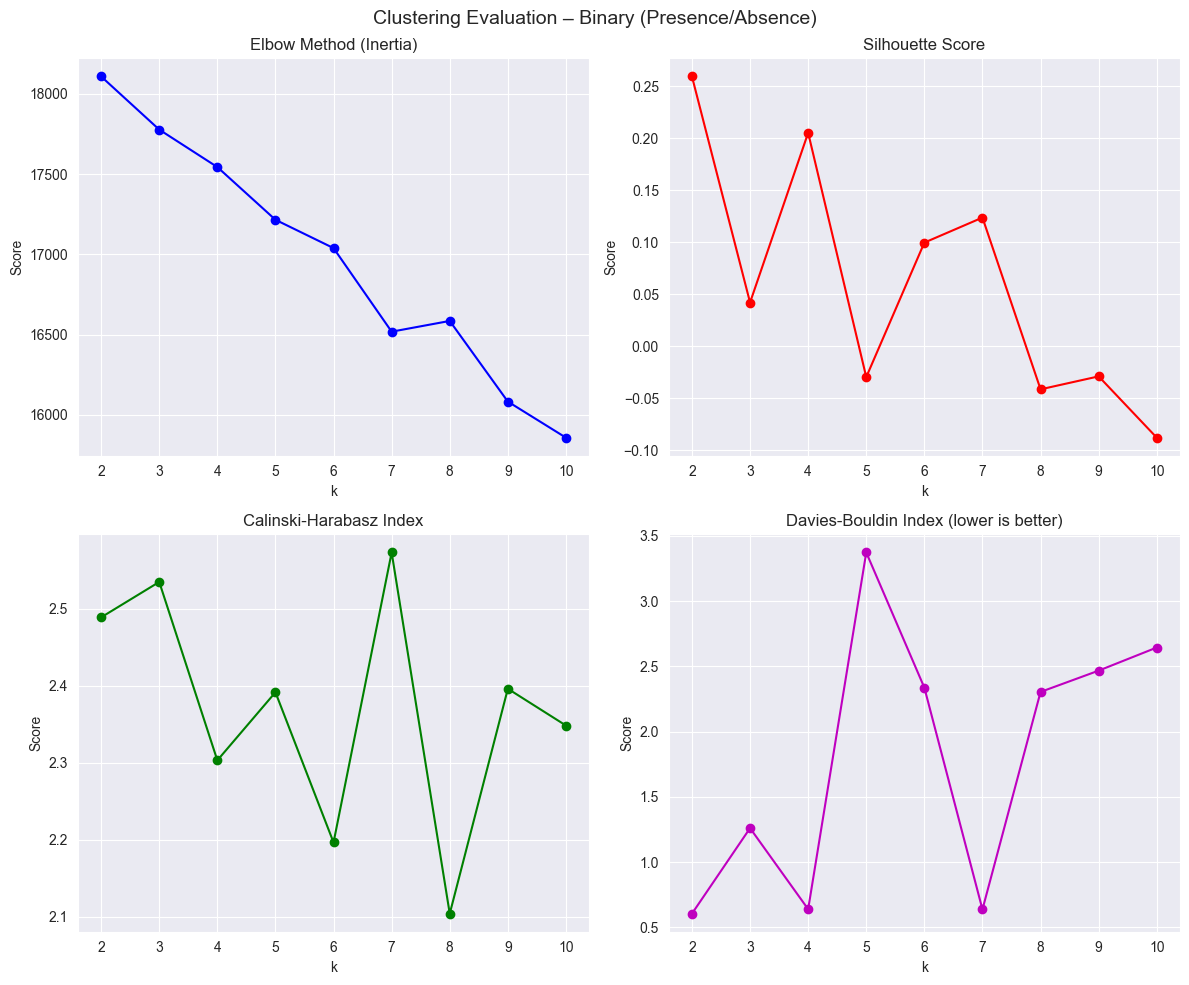

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ------------------------
# Function to evaluate one representation
# ------------------------
def evaluate_text_representation(X_text_reduced, name, X_scaled, numeric_cols):
    # Combine text + numeric
    X_combined = np.hstack([X_scaled, X_text_reduced])

    # Test different k
    K = range(2, 11)
    inertia, sil_scores, ch_scores, db_scores = [], [], [], []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_combined)

        inertia.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X_combined, labels))
        ch_scores.append(calinski_harabasz_score(X_combined, labels))
        db_scores.append(davies_bouldin_score(X_combined, labels))

    # Plot metrics
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Clustering Evaluation – {name}", fontsize=14)

    axes[0,0].plot(K, inertia, 'bo-')
    axes[0,0].set_title("Elbow Method (Inertia)")

    axes[0,1].plot(K, sil_scores, 'ro-')
    axes[0,1].set_title("Silhouette Score")

    axes[1,0].plot(K, ch_scores, 'go-')
    axes[1,0].set_title("Calinski-Harabasz Index")

    axes[1,1].plot(K, db_scores, 'mo-')
    axes[1,1].set_title("Davies-Bouldin Index (lower is better)")

    for ax in axes.flat:
        ax.set_xlabel("k")
        ax.set_ylabel("Score")

    plt.tight_layout()
    plt.show()

# ------------------------
# 1. Prepare numeric features
# ------------------------
numeric_cols = [
    "economic", "capacity_and_resources", "morality",
    "fairness_and_equality", "legality_constitutionality_and_jurisprudence",
    "policy_prescription_and_evaluation", "crime_and_punishment",
    "security_and_defense", "health_and_safety", "quality_of_life",
    "cultural_identity", "public_opinion", "political",
    "external_regulation_and_reputation"
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

# ------------------------
# 2a. TF-IDF Representation
# ------------------------
tfidf = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)
X_tfidf = tfidf.fit_transform(df["news"])
svd = TruncatedSVD(n_components=100, random_state=42)
X_tfidf_reduced = svd.fit_transform(X_tfidf)

evaluate_text_representation(X_tfidf_reduced, "TF-IDF", X_scaled, numeric_cols)

# ------------------------
# 2b. Term Frequency (Count)
# ------------------------
count_vect = CountVectorizer(max_features=5000, stop_words=spanish_stopwords, binary=False)
X_tf = count_vect.fit_transform(df["news"])
X_tf_reduced = svd.fit_transform(X_tf)

evaluate_text_representation(X_tf_reduced, "Term Frequency", X_scaled, numeric_cols)

# ------------------------
# 2c. Binary Presence/Absence
# ------------------------
binary_vect = CountVectorizer(max_features=5000, stop_words=spanish_stopwords, binary=True)
X_bin = binary_vect.fit_transform(df["news"])
X_bin_reduced = svd.fit_transform(X_bin)

evaluate_text_representation(X_bin_reduced, "Binary (Presence/Absence)", X_scaled, numeric_cols)


In [81]:
from sklearn.cluster import KMeans

rep = "tfidf"

if rep == "tfidf":
    X_text_reduced = X_tfidf_reduced
elif rep == "tf":
    X_text_reduced = X_tf_reduced
elif rep == "binary":
    X_text_reduced = X_bin_reduced
else:
    raise ValueError("Choose one of: 'tfidf', 'tf', 'binary'")

# --- Combine with numeric features ---
X_combined = np.hstack([X_scaled, X_text_reduced])

# --- Run clustering with best k ---
best_k = 5 # replace with the best k from your evaluation
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_combined)

df[f"final_clusters_{rep}"] = labels

In [82]:
cluster_frame_counts = (
    df.groupby([f"final_clusters_{rep}", "principal_frames"])
    .size()
    .reset_index(name="frequency")
)

# Optional: pivot for easier visualization
cluster_frame_pivot = cluster_frame_counts.pivot(
    index=f"final_clusters_{rep}",
    columns="principal_frames",
    values="frequency"
).fillna(0)

print(cluster_frame_counts)
print(cluster_frame_pivot)

    final_clusters_tfidf                              principal_frames  \
0                      0            external_regulation_and_reputation   
1                      0                             health_and_safety   
2                      0  legality_constitutionality_and_jurisprudence   
3                      0                                      morality   
4                      0            policy_prescription_and_evaluation   
5                      0                                     political   
6                      0                                public_opinion   
7                      0                          security_and_defense   
8                      1                        capacity_and_resources   
9                      1                          crime_and_punishment   
10                     1                                      economic   
11                     1                             health_and_safety   
12                     1              

Average Silhouette Score for k=5: 0.123


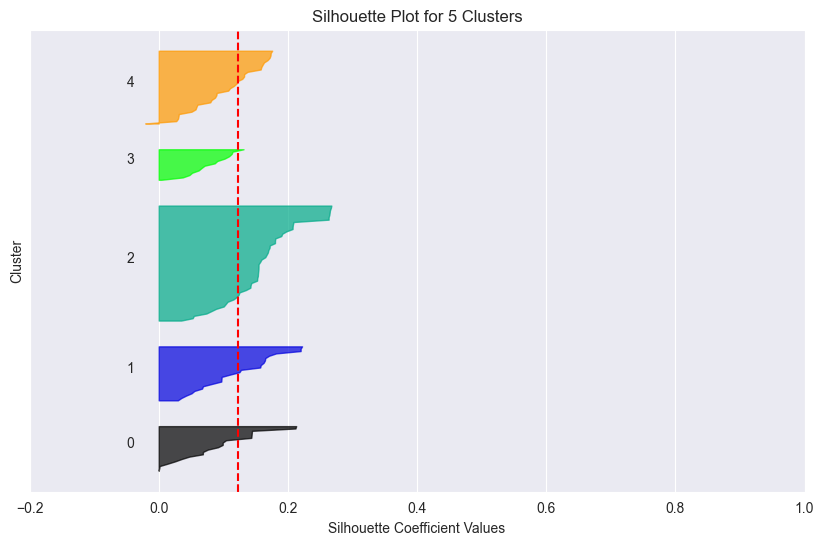

In [83]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette values
silhouette_avg = silhouette_score(X_combined, labels)
sample_silhouette_values = silhouette_samples(X_combined, labels)

print(f"Average Silhouette Score for k={best_k}: {silhouette_avg:.3f}")

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(best_k):
    # Select silhouette values for cluster i
    cluster_silhouette_values = sample_silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / best_k)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7
    )

    # Label cluster number
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # add space between clusters

ax.set_title(f"Silhouette Plot for {best_k} Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster")

# Average silhouette score line
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xlim([-0.2, 1])
plt.show()

In [84]:
df.head()

,id,news,frames,tone,principal_frames,economic,capacity_and_resources,morality,fairness_and_equality,legality_constitutionality_and_jurisprudence,...,political,external_regulation_and_reputation,country,news_cleaned,news_cleaned_without_stopwords,news_tokens,news_lemmes,frames_reduced,combined_clusters,final_clusters_tfidf
0,Noticia_1.txt,¿Cuánto tiempo estoy autorizado a permanecer e...,"['external_regulation_and_reputation', 'legali...",neutral,legality_constitutionality_and_jurisprudence,0,0,0,0,1,...,0,1,Colombia,cuánto tiempo estoy autorizado a permanecer e...,cuánto tiempo autorizado permanecer unidos \n...,cuánto tiempo autorizado permanecer unidos \n...,cua ́ nto tiempo autorizado permanecer unidos ...,2,2,4
1,Noticia_2.txt,Colombia y Venezuela instalaron comisión de ve...,"['policy_prescription_and_evaluation', 'politi...",neutral,political,1,0,1,0,0,...,1,1,Colombia,colombia y venezuela instalaron comisión de v...,colombia venezuela instalaron comisión vecind...,colombia venezuela instalaron comisión vecind...,colombia venezuela instalaron comisio ́ n veci...,2,1,1
2,Noticia_7.txt,"Atrasar proceso electoral hasta enero de 2024,...","['political', 'quality_of_life', 'public_opini...",neutral,political,0,0,0,0,0,...,1,0,Colombia,atrasar proceso electoral hasta enero de 2024 ...,atrasar proceso electoral enero 2024 puesto de...,atrasar proceso electoral enero 2024 puesto de...,atrasar proceso electoral enero 2024 puesto de...,2,1,2
3,Noticia_8.txt,Avanza SLP en cuanto a transparencia presupues...,"['policy_prescription_and_evaluation', 'public...",neutral,policy_prescription_and_evaluation,0,0,0,0,0,...,0,1,Colombia,avanza slp en cuanto a transparencia presupues...,avanza slp transparencia presupuestal 2023 imc...,avanza slp transparencia presupuestal 2023 imc...,avanza slp transparencia presupuestal 2023 imc...,2,1,2
4,Noticia_9.txt,Confía dirigente del PT en mantener el registr...,"['external_regulation_and_reputation', 'qualit...",negative,fairness_and_equality,0,1,0,1,0,...,0,1,Colombia,confía dirigente del pt en mantener el regist...,confía dirigente pt mantener registro san lui...,confía dirigente pt mantener registro san lui...,confi ́ a dirigente pt mantener registro san l...,2,0,2


In [85]:
df.loc[df["final_clusters_tfidf"] == 2, ["frames", "principal_frames", "final_clusters_tfidf"]]


,frames,principal_frames,final_clusters_tfidf
2,"['political', 'quality_of_life', 'public_opini...",political,2
3,"['policy_prescription_and_evaluation', 'public...",policy_prescription_and_evaluation,2
4,"['external_regulation_and_reputation', 'qualit...",fairness_and_equality,2
5,"['external_regulation_and_reputation', 'politi...",external_regulation_and_reputation,2
6,"['political', 'public_opinion']",political,2
11,"['policy_prescription_and_evaluation', 'qualit...",policy_prescription_and_evaluation,2
12,['political'],political,2
15,['legality_constitutionality_and_jurisprudence...,policy_prescription_and_evaluation,2
16,['legality_constitutionality_and_jurisprudence...,policy_prescription_and_evaluation,2
19,['public_opinion'],public_opinion,2


In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

frames = [
    "economic", "capacity_and_resources", "morality",
    "fairness_and_equality", "legality_constitutionality_and_jurisprudence",
    "policy_prescription_and_evaluation", "crime_and_punishment",
    "security_and_defense", "health_and_safety", "quality_of_life",
    "cultural_identity", "public_opinion", "political",
    "external_regulation_and_reputation"
]

# -----------------------------
# 1. Encode tone
# -----------------------------
tone_dummies = pd.get_dummies(df["tone"], prefix="tone")

# -----------------------------
# 2. Text features (TF-IDF)
# -----------------------------
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")  # cap at 500 to keep it manageable
text_features = vectorizer.fit_transform(df["news"]).toarray()
text_df = pd.DataFrame(text_features, columns=[f"text_{i}" for i in range(text_features.shape[1])])

# -----------------------------
# 3. Combine (frames + tone + text)
# -----------------------------
X = pd.concat([df[frames].reset_index(drop=True), tone_dummies.reset_index(drop=True), text_df.reset_index(drop=True)], axis=1)

print("Combined feature matrix (frames + tone + text):")
print(X.head())

# -----------------------------
# 4. Nearest Neighbors (documents now, not just frames)
# -----------------------------
nbrs = NearestNeighbors(n_neighbors=4, metric="euclidean").fit(X)
distances, indices = nbrs.kneighbors(X)

for i in range(len(X)):
    print(f"\nDocument {i} is closest to:")
    for j, idx in enumerate(indices[i][1:]):
        print(f"   Document {idx} (dist={distances[i][j+1]:.3f})")

# -----------------------------
# 5. KMeans clustering (documents)
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df_clusters = df.copy()
df_clusters["cluster"] = clusters

print("\nDocument → Cluster mapping:")
print(df_clusters[["news", "principal_frames", "tone", "cluster"]].head(20))

# -----------------------------
# 6. Cluster frequency
# -----------------------------
cluster_counts = df_clusters["cluster"].value_counts().reset_index()
cluster_counts.columns = ["cluster", "num_documents"]

print("\nCluster frequencies (number of news articles):")
print(cluster_counts)


Combined feature matrix (frames + tone + text):
   economic  capacity_and_resources  morality  fairness_and_equality  \
0         0                       0         0                      0   
1         1                       0         1                      0   
2         0                       0         0                      0   
3         0                       0         0                      0   
4         0                       1         0                      1   

   legality_constitutionality_and_jurisprudence  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   policy_prescription_and_evaluation  crime_and_punishment  \
0                                   1                     1   
1                                   1                     0   
2                      

In [87]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

frames = [
    "economic", "capacity_and_resources", "morality",
    "fairness_and_equality", "legality_constitutionality_and_jurisprudence",
    "policy_prescription_and_evaluation", "crime_and_punishment",
    "security_and_defense", "health_and_safety", "quality_of_life",
    "cultural_identity", "public_opinion", "political",
    "external_regulation_and_reputation"
]

# -----------------------------
# 1. Build frame profiles
# -----------------------------
frame_profiles = df[frames].T   # rows = frames, columns = docs

# -----------------------------
# 2. Cluster unique frames
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
frame_clusters = kmeans.fit_predict(frame_profiles)


frame_cluster_map = pd.DataFrame({
    "frame": frames,
    "cluster": frame_clusters
})

print("\nUnique frame → cluster mapping:")
print(frame_cluster_map.sort_values("cluster"))

# -----------------------------
# 3. Map each document’s frame to its cluster
# -----------------------------
frame_to_cluster = dict(zip(frame_cluster_map["frame"], frame_cluster_map["cluster"]))

df["frame_cluster"] = df["principal_frames"].map(frame_to_cluster)

print("\nDocuments with mapped clusters (no duplicates per frame):")
print(df[["principal_frames", "frame_cluster"]].head(20))


Unique frame → cluster mapping:
                                           frame  cluster
5             policy_prescription_and_evaluation        0
4   legality_constitutionality_and_jurisprudence        0
11                                public_opinion        1
0                                       economic        2
3                          fairness_and_equality        2
2                                       morality        2
6                           crime_and_punishment        2
1                         capacity_and_resources        2
7                           security_and_defense        2
8                              health_and_safety        2
9                                quality_of_life        2
10                             cultural_identity        2
13            external_regulation_and_reputation        2
12                                     political        3

Documents with mapped clusters (no duplicates per frame):
                                princi

In [88]:
order  = df["frame_cluster"].value_counts().index

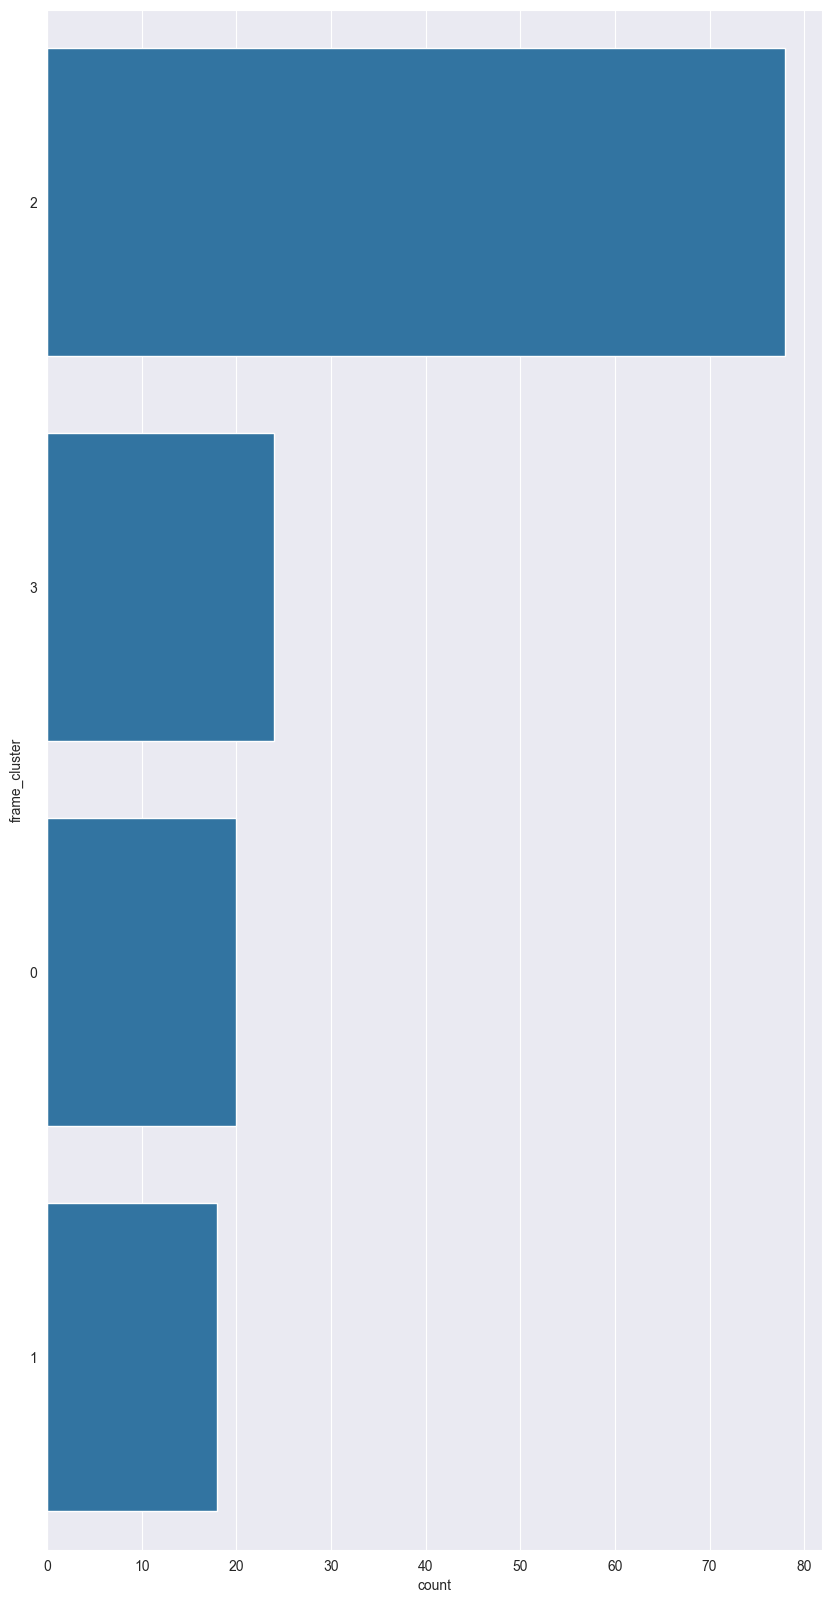

In [89]:
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="frame_cluster", order=order)
plt.show()

In [90]:
df["principal_frames"].unique()

array(['legality_constitutionality_and_jurisprudence', 'political',
       'policy_prescription_and_evaluation', 'fairness_and_equality',
       'external_regulation_and_reputation', 'health_and_safety',
       'economic', 'public_opinion', 'crime_and_punishment',
       'security_and_defense', 'morality', 'cultural_identity',
       'quality_of_life', 'capacity_and_resources'], dtype=object)

In [91]:
frame_groups = {
    "legality_constitutionality_and_jurisprudence": "institutional_governance",
    "political": "institutional_governance",
    "policy_prescription_and_evaluation": "institutional_governance",
    "external_regulation_and_reputation": "institutional_governance",
    "public_opinion": "institutional_governance",

    "fairness_and_equality": "justice_ethics_values",
    "morality": "justice_ethics_values",
    "cultural_identity": "justice_ethics_values",

    "crime_and_punishment": "security_order",
    "security_and_defense": "security_order",

    "economic": "socioeconomic_wellbeing",
    "capacity_and_resources": "socioeconomic_wellbeing",
    "quality_of_life": "socioeconomic_wellbeing",
    "health_and_safety": "socioeconomic_wellbeing"
}


In [92]:
df["frame_group"] = df["principal_frames"].map(frame_groups)

In [93]:
df.head()

,id,news,frames,tone,principal_frames,economic,capacity_and_resources,morality,fairness_and_equality,legality_constitutionality_and_jurisprudence,...,country,news_cleaned,news_cleaned_without_stopwords,news_tokens,news_lemmes,frames_reduced,combined_clusters,final_clusters_tfidf,frame_cluster,frame_group
0,Noticia_1.txt,¿Cuánto tiempo estoy autorizado a permanecer e...,"['external_regulation_and_reputation', 'legali...",neutral,legality_constitutionality_and_jurisprudence,0,0,0,0,1,...,Colombia,cuánto tiempo estoy autorizado a permanecer e...,cuánto tiempo autorizado permanecer unidos \n...,cuánto tiempo autorizado permanecer unidos \n...,cua ́ nto tiempo autorizado permanecer unidos ...,2,2,4,0,institutional_governance
1,Noticia_2.txt,Colombia y Venezuela instalaron comisión de ve...,"['policy_prescription_and_evaluation', 'politi...",neutral,political,1,0,1,0,0,...,Colombia,colombia y venezuela instalaron comisión de v...,colombia venezuela instalaron comisión vecind...,colombia venezuela instalaron comisión vecind...,colombia venezuela instalaron comisio ́ n veci...,2,1,1,3,institutional_governance
2,Noticia_7.txt,"Atrasar proceso electoral hasta enero de 2024,...","['political', 'quality_of_life', 'public_opini...",neutral,political,0,0,0,0,0,...,Colombia,atrasar proceso electoral hasta enero de 2024 ...,atrasar proceso electoral enero 2024 puesto de...,atrasar proceso electoral enero 2024 puesto de...,atrasar proceso electoral enero 2024 puesto de...,2,1,2,3,institutional_governance
3,Noticia_8.txt,Avanza SLP en cuanto a transparencia presupues...,"['policy_prescription_and_evaluation', 'public...",neutral,policy_prescription_and_evaluation,0,0,0,0,0,...,Colombia,avanza slp en cuanto a transparencia presupues...,avanza slp transparencia presupuestal 2023 imc...,avanza slp transparencia presupuestal 2023 imc...,avanza slp transparencia presupuestal 2023 imc...,2,1,2,0,institutional_governance
4,Noticia_9.txt,Confía dirigente del PT en mantener el registr...,"['external_regulation_and_reputation', 'qualit...",negative,fairness_and_equality,0,1,0,1,0,...,Colombia,confía dirigente del pt en mantener el regist...,confía dirigente pt mantener registro san lui...,confía dirigente pt mantener registro san lui...,confi ́ a dirigente pt mantener registro san l...,2,0,2,2,justice_ethics_values


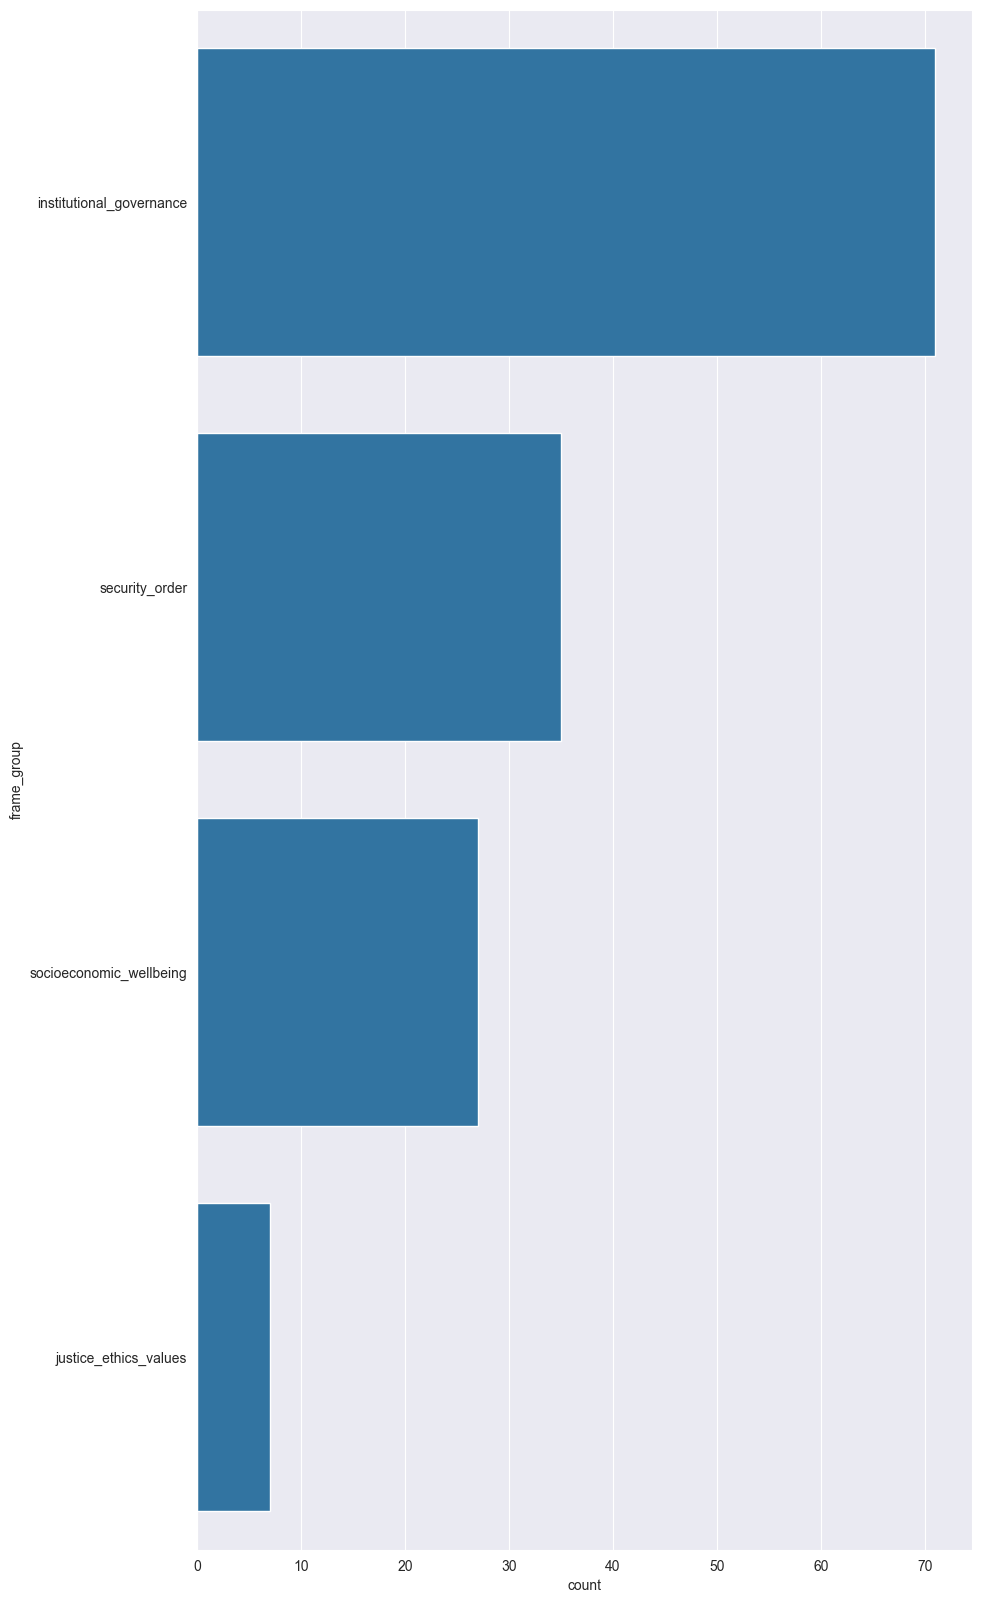

In [94]:
order  = df["frame_group"].value_counts().index
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="frame_group", order=order)
plt.show()

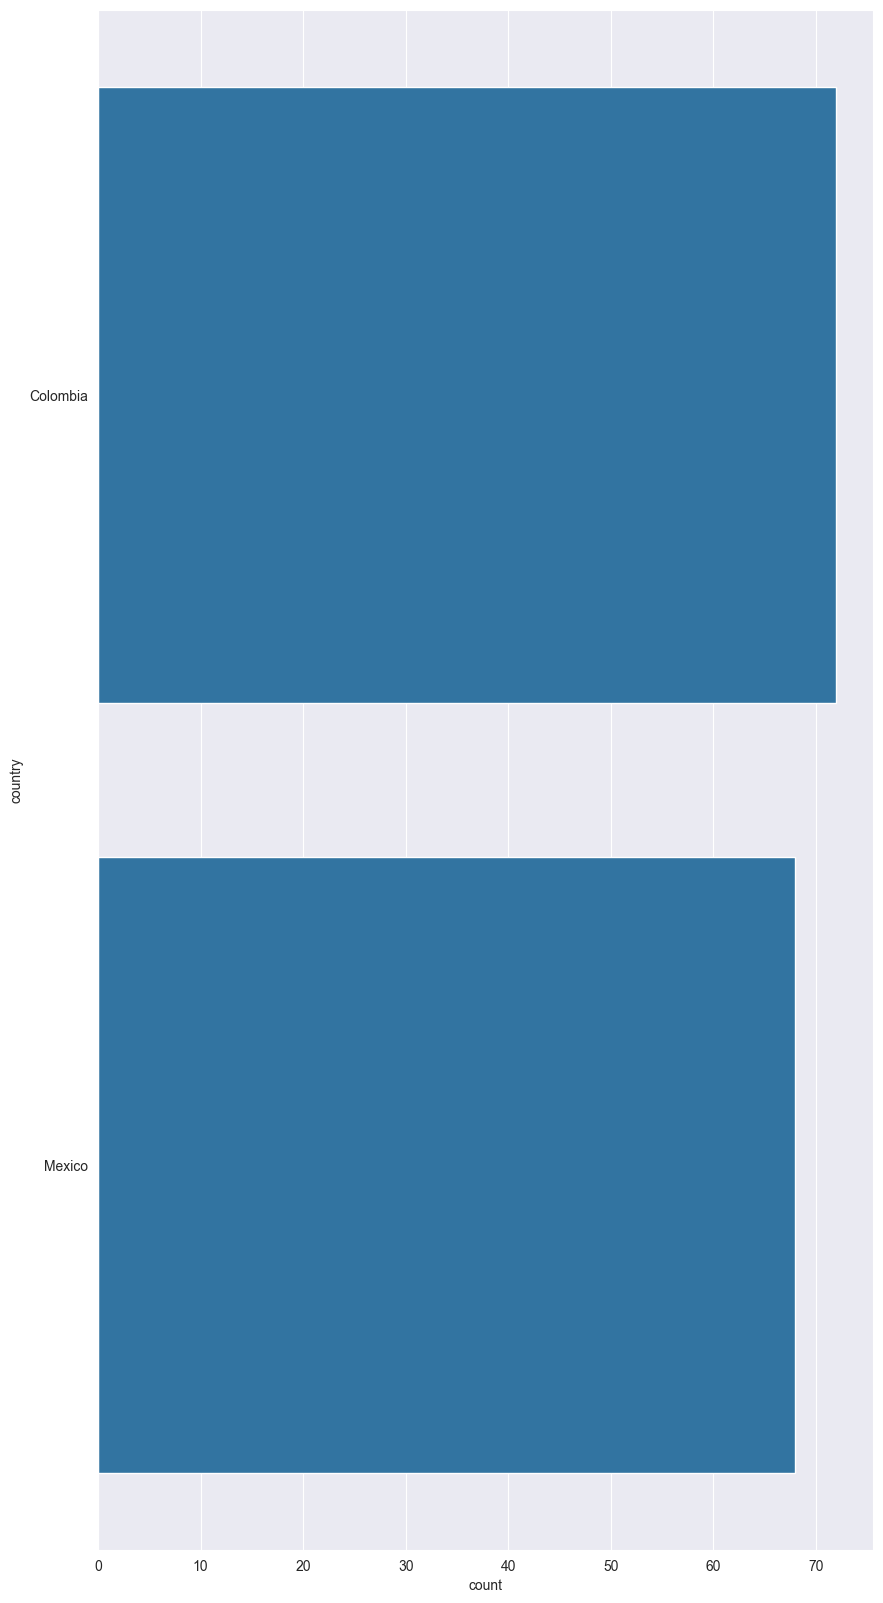

In [95]:
order  = df["country"].value_counts().index
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="country", order=order)
plt.show()